In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cyberattack/kddcup.data_10_percent


In [2]:
df=pd.read_csv('/kaggle/input/kdd-cyberattack/kddcup.data_10_percent')

In [3]:
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


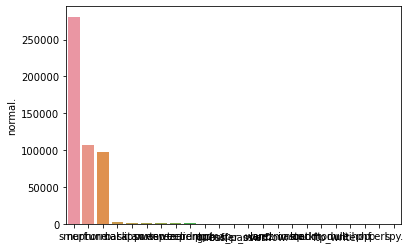

In [4]:
import seaborn as sns
sns.barplot(df['normal.'].value_counts().index,df['normal.'].value_counts())

In [5]:
df['normal.'].value_counts()

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: normal., dtype: int64

In [6]:
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df['normal.']=df['normal.'].replace({'smurf.':'attack',              
'neptune.':'attack',            
'back.':'attack',                
'satan.':'attack',              
'ipsweep.':'attack',              
'portsweep.':'attack',           
'warezclient.':'attack',          
'teardrop.':'attack',              
'pod.':'attack',                   
'nmap.':'attack',                  
'guess_passwd.':'attack',           
'buffer_overflow.':'attack',        
'land.':'attack',                   
'warezmaster.':'attack',            
'imap.':'attack',                   
'rootkit.':'attack',                
'loadmodule.':'attack',              
'ftp_write.':'attack',               
'multihop.':'attack',                
'phf.':'attack',                     
'perl.':'attack',                    
'spy.':'attack'})

In [8]:
df['normal.'].value_counts()

attack     396743
normal.     97277
Name: normal., dtype: int64

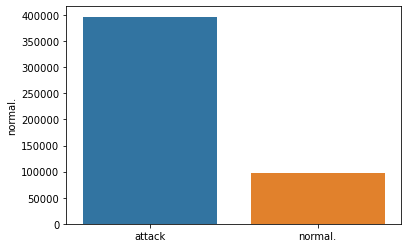

In [9]:
sns.barplot(df['normal.'].value_counts().index,df['normal.'].value_counts())

In [10]:
df.var()

0          5.009061e+05
181        9.765770e+11
5450       1.091644e+09
0.1        4.453072e-05
0.2        1.817249e-02
0.3        3.036300e-05
0.4        6.116857e-01
0.5        2.408584e-04
1          1.262687e-01
0.6        3.233984e+00
0.7        1.113194e-04
0.8        6.072508e-05
0.9        4.051043e+00
0.10       9.296040e-03
0.11       1.214409e-04
0.12       1.330916e-03
0.13       0.000000e+00
0.14       0.000000e+00
0.15       1.384664e-03
8          4.543170e+04
8.1        6.067489e+04
0.00       1.449456e-01
0.00.1     1.451739e-01
0.00.2     5.364954e-02
0.00.3     5.389232e-02
1.00       1.506913e-01
0.00.4     6.757756e-03
0.00.5     2.027708e-02
9          4.191872e+03
9.1        1.124453e+04
1.00.1     1.687412e-01
0.00.6     1.193758e-02
0.11.1     2.316586e-01
0.00.7     1.775183e-03
0.00.8     1.448513e-01
0.00.9     1.450999e-01
0.00.10    5.317162e-02
0.00.11    5.296467e-02
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  object 
 2   http     494020 non-null  object 
 3   SF       494020 non-null  object 
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.11     494020 non-null  int64  
 18  0.12     494020 non-null  int64  
 19  0.13     494020 non-null  int64  
 20  0.14     494020 non-null  

In [14]:
df['tcp'].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: tcp, dtype: int64

In [15]:
df['http'].value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
tftp_u          1
pm_dump         1
red_i           1
Name: http, Length: 66, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['normal.']=encoder.fit_transform(df['normal.'])

In [17]:
df['normal.'].value_counts()

0    396743
1     97277
Name: normal., dtype: int64

In [18]:
df['tcp']=encoder.fit_transform(df['tcp'])

In [19]:
df['http']=encoder.fit_transform(df['http'])

In [20]:
df['SF']=encoder.fit_transform(df['SF'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  int64  
 2   http     494020 non-null  int64  
 3   SF       494020 non-null  int64  
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.11     494020 non-null  int64  
 18  0.12     494020 non-null  int64  
 19  0.13     494020 non-null  int64  
 20  0.14     494020 non-null  

In [22]:
x=df.drop(['normal.'],axis=1)
y=df['normal.'].values

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,stratify=y)
model=RandomForestClassifier(n_estimators=100)


In [24]:
model.fit(x_train,x_test)

RandomForestClassifier()

In [25]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
len(model.feature_importances_)

41

In [29]:
list(zip(range(1,42),model.feature_importances_))

[(1, 0.007268400561014472),
 (2, 0.07033981840879476),
 (3, 0.026117998920839065),
 (4, 0.022958071084362743),
 (5, 0.06389416922653142),
 (6, 0.15351986893529251),
 (7, 9.092390649398504e-06),
 (8, 0.002657306890553952),
 (9, 5.944638217950694e-06),
 (10, 0.00821854016272606),
 (11, 0.0001031678656601144),
 (12, 0.1392140263194149),
 (13, 0.007241770933435517),
 (14, 4.7449251274583584e-05),
 (15, 2.8108228068554594e-06),
 (16, 0.00012388637585882497),
 (17, 5.92688549433959e-05),
 (18, 1.9683975944369865e-05),
 (19, 1.4044296913840683e-05),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0005667531468140504),
 (23, 0.20442692791120579),
 (24, 0.041425336678836695),
 (25, 0.010823951727833115),
 (26, 0.0024859754160881636),
 (27, 0.0023885148186588543),
 (28, 0.0013007173073648554),
 (29, 0.014443651183760854),
 (30, 0.034151973771646596),
 (31, 0.019348785788996226),
 (32, 0.053837417421617836),
 (33, 0.02007089619592187),
 (34, 0.006119572078716005),
 (35, 0.01106151529395017),
 (36, 0.023071141626

In [30]:
model.score(x_train,x_test)

1.0

In [31]:
model.score(y_train,y_test)

0.9998077000931136

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test,model.predict(y_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79349
           1       1.00      1.00      1.00     19455

    accuracy                           1.00     98804
   macro avg       1.00      1.00      1.00     98804
weighted avg       1.00      1.00      1.00     98804



In [35]:
print(metrics.confusion_matrix(y_test,model.predict(y_train)))

SyntaxError: unexpected EOF while parsing (<ipython-input-35-b86cda17bef7>, line 1)